### DISCUSSION POSTING
Collect overall player performance metrics from ESPN’s Real Plus Minus (http://espn.go.com/nba/statistics/rpm/_/sort/RPM) and other sources (basketball-reference.com, Hollinger PER, http://www.boxscoregeeks.com/players, etc.). Compare and contrast some of the rankings. Come up with ways that you would want to use to reconcile important differences in evaluating players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
ESPN_RPM = pd.read_excel('ESPN_Real_Plus_Minus.xlsx')
BB_reference = pd.read_excel('BB_reference.xlsx')
Hollinger_PER = pd.read_excel('Hollinger_PER.xlsx')
DARKO = pd.read_excel('DARKO - Daily Adjusted and Regressed Kalman Optimized projections.xlsx')

In [3]:
DARKO_new = pd.DataFrame()  # Initialize an empty DataFrame for DARKO_new
ESPN_RPM_new = pd.DataFrame()  # Initialize an empty DataFrame for ESPN_RPM_new
Hollinger_PER_new = pd.DataFrame()  # Initialize an empty DataFrame for Hollinger_PER_new
BB_reference_new = pd.DataFrame()  # Initialize an empty DataFrame for BB_reference_new

for player in DARKO['Player Name']:
    if player in ESPN_RPM['NAME'].values and player in Hollinger_PER['PLAYER'].values and player in BB_reference['NAME'].values:
        darko_player_row = DARKO[DARKO['Player Name'] == player]
        espn_rpm_player_row = ESPN_RPM[ESPN_RPM['NAME'] == player]
        hollinger_per_player_row = Hollinger_PER[Hollinger_PER['PLAYER'] == player]
        bb_reference_player_row = BB_reference[BB_reference['NAME'] == player]
        
        DARKO_new = pd.concat([DARKO_new, darko_player_row])
        ESPN_RPM_new = pd.concat([ESPN_RPM_new, espn_rpm_player_row])
        Hollinger_PER_new = pd.concat([Hollinger_PER_new, hollinger_per_player_row])
        BB_reference_new = pd.concat([BB_reference_new, bb_reference_player_row])

# Reset the index of new DataFrames
DARKO_new.reset_index(drop=True, inplace=True)
ESPN_RPM_new.reset_index(drop=True, inplace=True)
Hollinger_PER_new.reset_index(drop=True, inplace=True)
BB_reference_new.reset_index(drop=True, inplace=True)

# Now DARKO_new, ESPN_RPM_new, Hollinger_PER_new, and BB_reference_new contain the data for players present in all dataframes



In [4]:
# GP_thr = 0
# filtered_ESPN_RPM = ESPN_RPM[ESPN_RPM['GP'] > GP_thr]
# filtered_ESPN_RPM = filtered_ESPN_RPM.set_index(np.arange(0,filtered_ESPN_RPM.shape[0]))



# idx_4_Hollinger_PER = []

# for player in range(len(filtered_ESPN_RPM['NAME'])):
#     idx_4_Hollinger_PER.append(list(Hollinger_PER['PLAYER']).index(filtered_ESPN_RPM['NAME'][player]))
    
# idx_4_Hollinger_PER = np.array(idx_4_Hollinger_PER)

# Hollinger_PER_reordered = Hollinger_PER.iloc[idx_4_Hollinger_PER]
# Hollinger_PER_reordered = Hollinger_PER_reordered.set_index(filtered_ESPN_RPM.index)

# idx_4_BB_reference = []
# for player in range(len(filtered_ESPN_RPM['NAME'])):
#     idx_4_BB_reference.append(list(BB_reference['NAME']).index(filtered_ESPN_RPM['NAME'][player]))
    
# idx_4_BB_reference = np.array(idx_4_BB_reference)

# BB_reference_reordered = BB_reference.iloc[idx_4_BB_reference]
# BB_reference_reordered = BB_reference_reordered.set_index(filtered_ESPN_RPM.index)


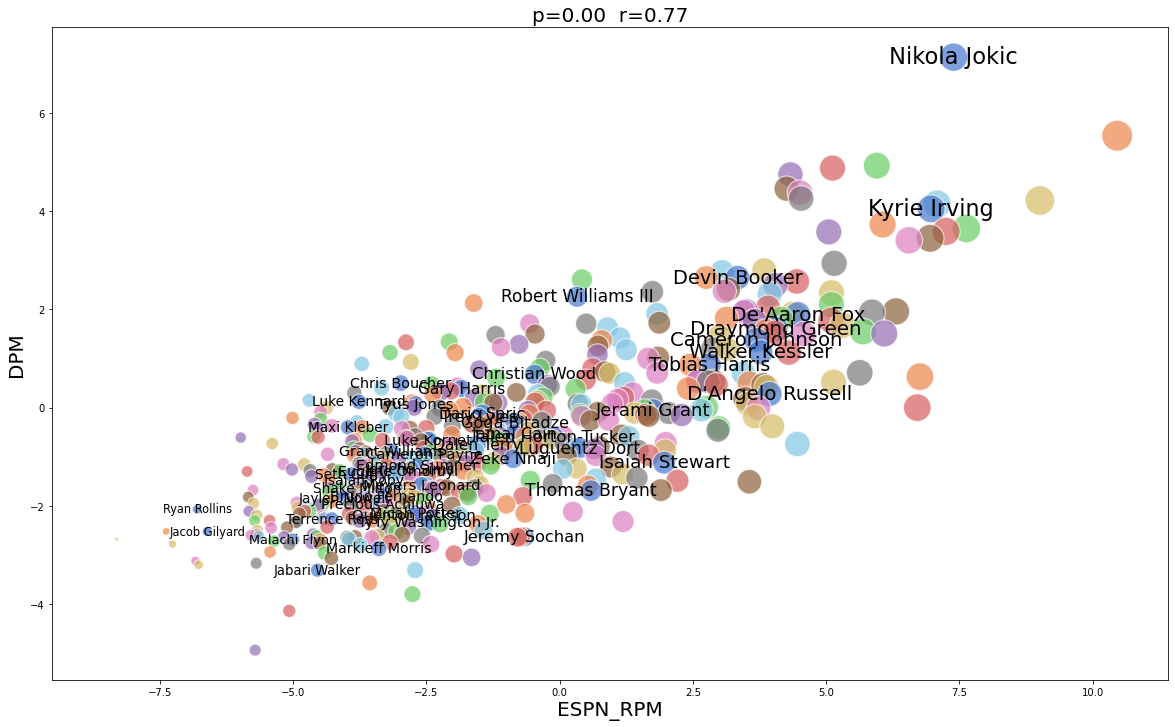

In [5]:
data2plot = {
    'ESPN_RPM': np.array(ESPN_RPM_new['RPM']),
    'DPM': np.array(DARKO_new['DPM']),
#     'Hollinger_PER': np.array(Hollinger_PER_reordered['PER']),
    'PLAYER': ESPN_RPM_new['NAME']  # Add the 'PLAYER' column
}

# Create a DataFrame from the 'data2plot' dictionary
df_data2plot = pd.DataFrame(data2plot)

r, p = scipy.stats.pearsonr(df_data2plot['ESPN_RPM'], df_data2plot['DPM'])


# Create a DataFrame from the 'data2plot' dictionary
df_data2plot = pd.DataFrame(data2plot)

# Calculate 's' values for marker sizes based on 'ESPN_RPM'
# You can adjust the scaling factor to fit your preference
scaling_factor = 50  # Adjust as needed
marker_sizes = scaling_factor * (df_data2plot['ESPN_RPM'] - df_data2plot['ESPN_RPM'].min())

# Set a larger figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

# Manually specify a custom color for each point
custom_colors = sns.color_palette("muted", n_colors=len(df_data2plot))

# Create the scatter plot with custom colors and marker sizes
ax = sns.scatterplot(x='ESPN_RPM', 
                     y='DPM', 
                     data=df_data2plot,
                     s=marker_sizes,  # Adjust the marker sizes
                     c=custom_colors, 
                     alpha=0.7)

ax.set_xlabel('ESPN_RPM', fontsize=20)
ax.set_ylabel('DPM', fontsize=20)


def normalize_values(input_list, target_min, target_max):
    min_value = min(input_list)
    max_value = max(input_list)
    
    normalized_values = []
    for value in input_list:
        normalized_value = ((value - min_value) / (max_value - min_value)) * (target_max - target_min) + target_min
        normalized_values.append(normalized_value)
    
    return normalized_values

# Example usage
target_min = 10
target_max = 25

normalized_values = normalize_values(marker_sizes, target_min, target_max)



# Annotate the plot with player names
for i, player in enumerate(df_data2plot['PLAYER']):
    if i % 10 == 0:
        ax.text(df_data2plot['ESPN_RPM'][i], df_data2plot['DPM'][i], player, 
                fontsize=normalized_values[i], ha='center', va='center')

plt.title("p={:.2f}  r={:.2f}".format(p, r), fontsize=20)
plt.show()

In [94]:
DARKO_new.keys()

Index(['NBA ID', 'Player Name', 'Position', 'Age', 'DPM', 'Offensive DPM',
       'Defensive DPM', 'Box Only O-DPM', 'Box Only D-DPM', 'On Off O-DPM',
       'On Off D-DPM'],
      dtype='object')

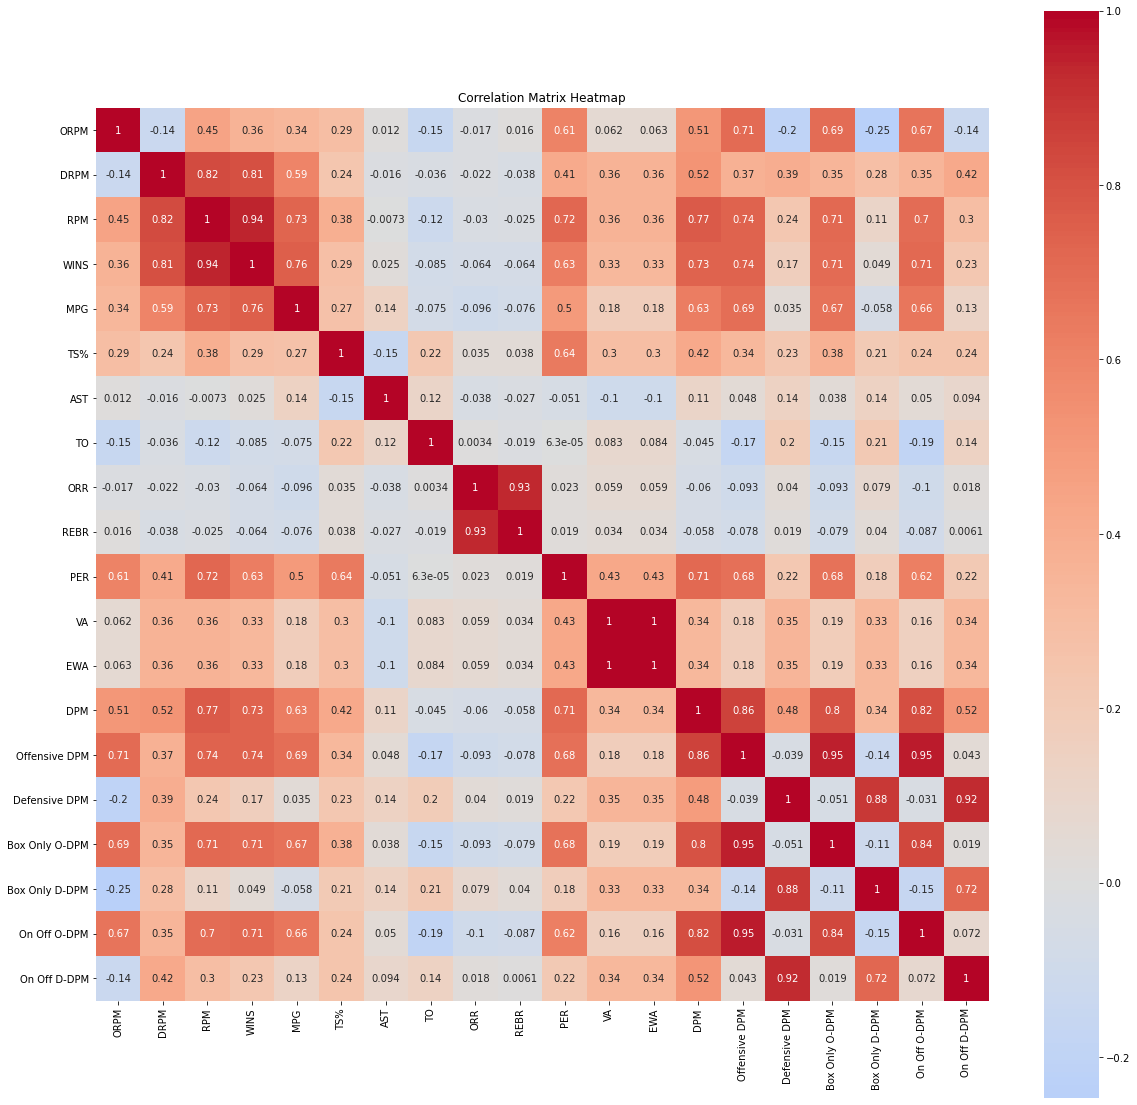

In [11]:
variables1 = ["ORPM", "DRPM", "RPM", "WINS"]
variables2 = ["AJP48", "WP48", "WP", "POP48", "PTS", "REB", "AST"]
variables3 = ["MPG", "TS%", "AST", "TO", "ORR", "REBR", "PER", "VA", "EWA"]
variables4 =['DPM', 'Offensive DPM', 'Defensive DPM', 'Box Only O-DPM', 
            'Box Only D-DPM', 'On Off O-DPM', 'On Off D-DPM']


concatenated_df = pd.concat([ESPN_RPM_new[variables1],
                             Hollinger_PER_new[variables3],
                            DARKO_new[variables4]], axis=1)


correlation_matrix = concatenated_df.corr()

# Set up the figure and axis size
plt.figure(figsize=(20, 20))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

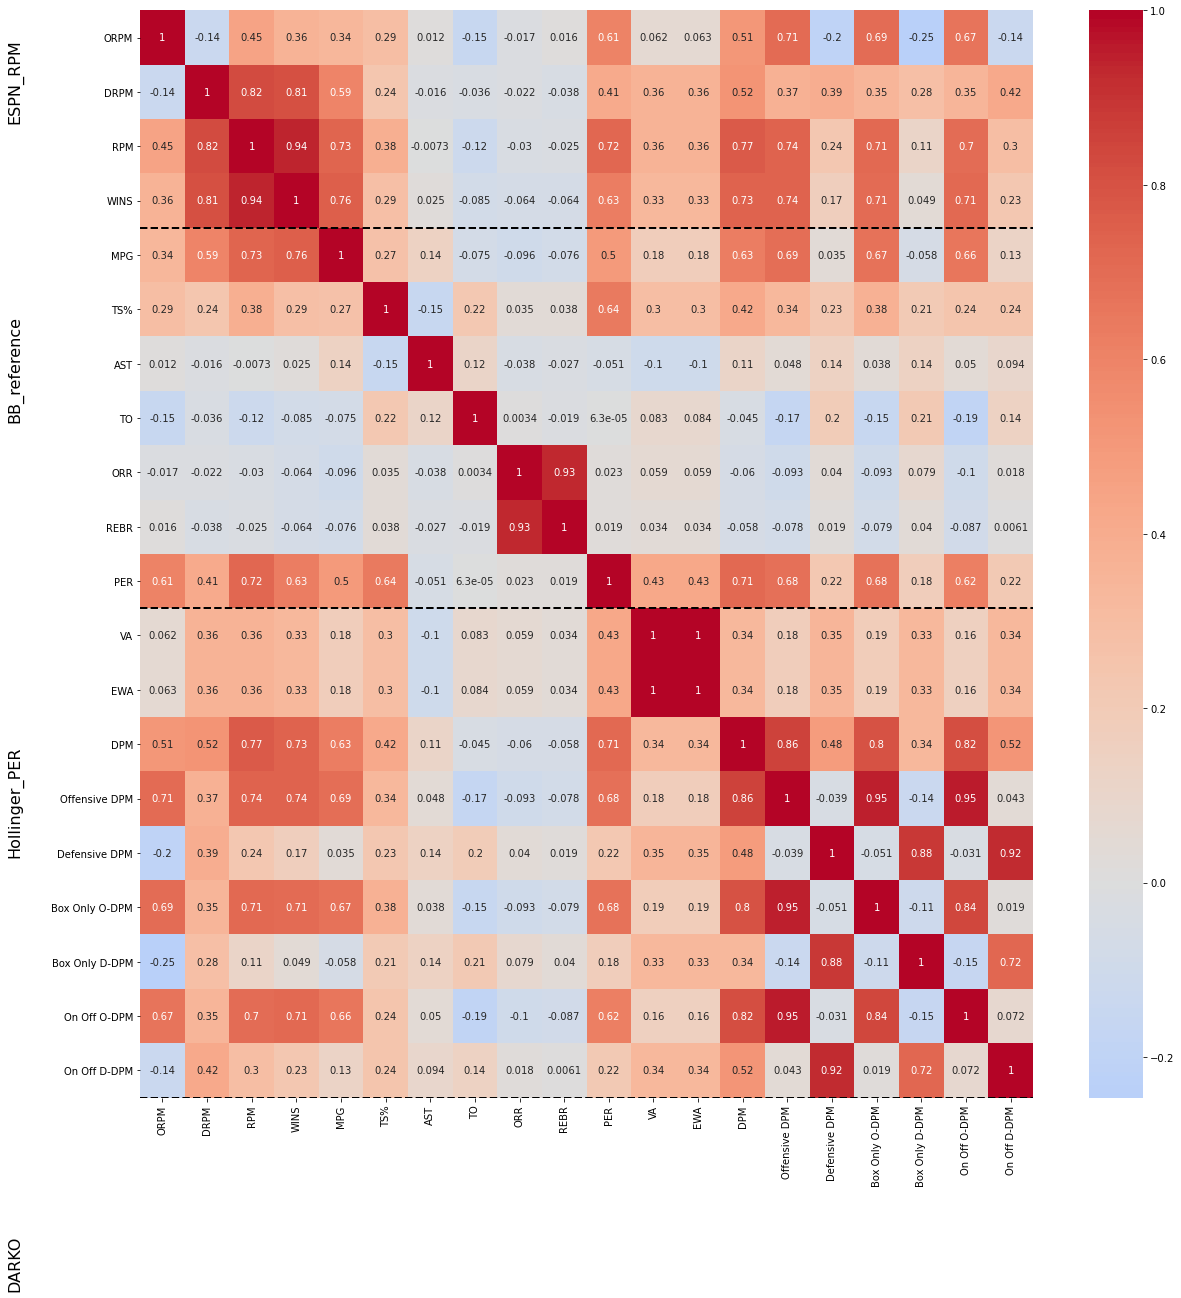

In [12]:
# List of variable sets and their corresponding dataframes
variable_sets = [variables1, variables2, variables3, variables4]
dataframes = [ESPN_RPM_new, BB_reference_new, Hollinger_PER_new, DARKO_new]
dataframe_names = ['ESPN_RPM', 'BB_reference', 'Hollinger_PER', 'DARKO']

# Calculate the starting and ending index for each group of variables
variable_ranges = [(0, len(variables1)),
                   (len(variables1), len(variables1) + len(variables2)),
                   (len(variables1) + len(variables2), len(variables1) + len(variables2) + len(variables3)),
                   (len(variables1) + len(variables2) + len(variables3),
                    len(variables1) + len(variables2) + len(variables3) + len(variables4))]

# Set up the figure and axis size
fig, ax = plt.subplots(figsize=(20, 20))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


# Set y-axis limits for each group of variables
for idx, (start, end) in enumerate(variable_ranges[:-1]):
    y_limit = (end)
    ax.axhline(y_limit, color='black', linewidth=2, linestyle='--')

# Annotate y axis with dataframe names
for idx, (start, end) in enumerate(variable_ranges):
    y_center = (start + end) / 2
    x_position = -1.9
    ax.annotate(dataframe_names[idx],
                xy=(x_position, y_center),
                xytext=(-40, 0),
                textcoords='offset points',
                ha='center',
                fontsize=16,
                annotation_clip=False,
                rotation=90)
    
plt.show()





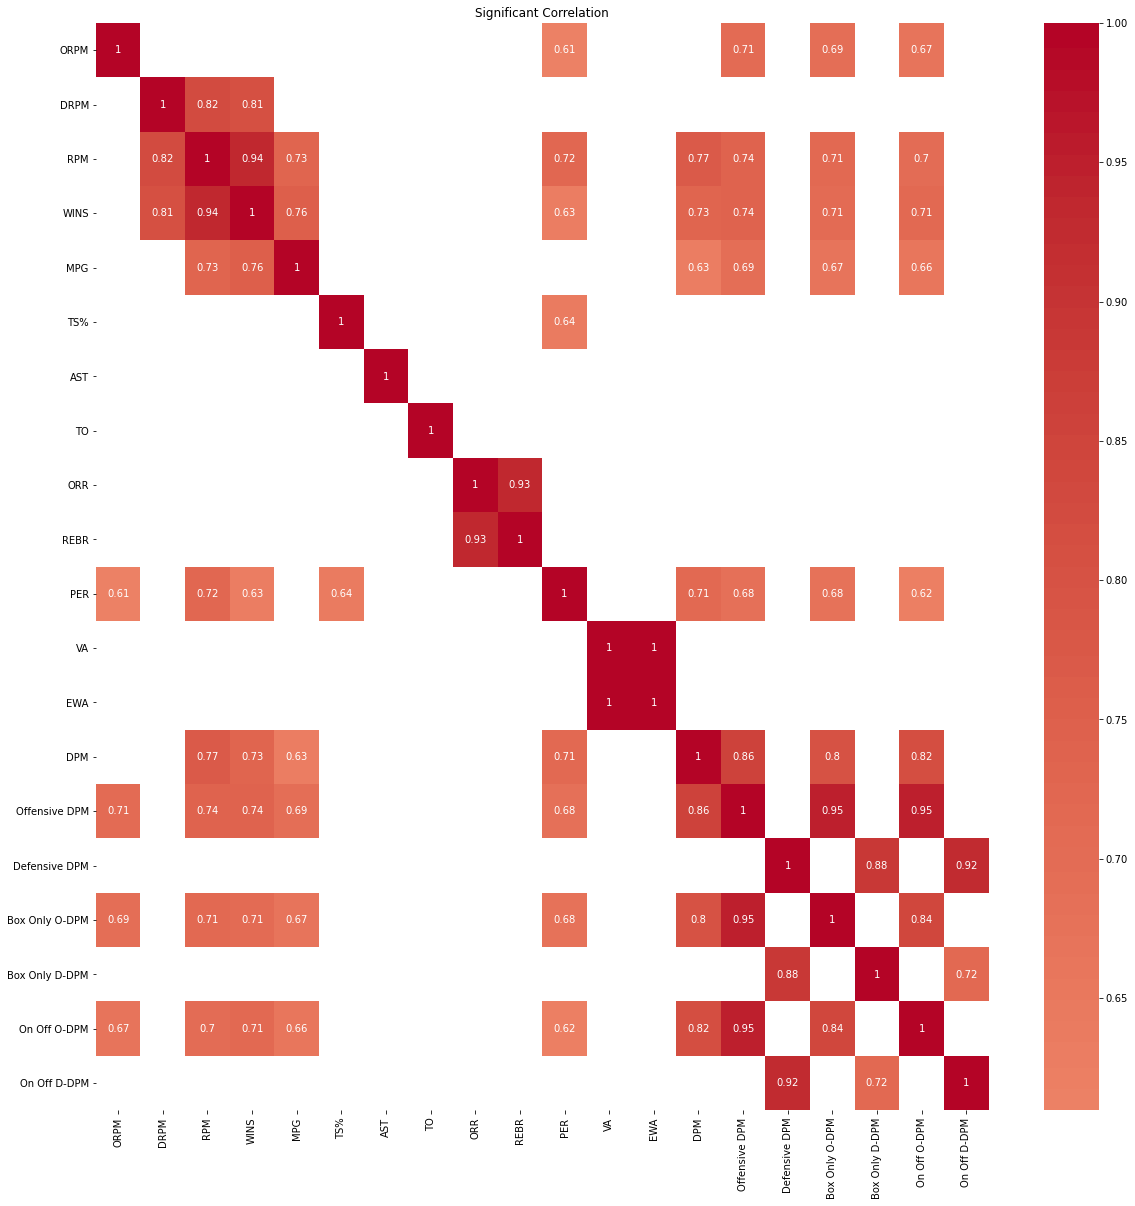

In [13]:
# Calculate the correlation matrix
correlation_matrix = concatenated_df.corr()

# Set the threshold for significant correlation
threshold = 0.6  # Adjust as needed

# Create a mask for non-significant correlations
mask = np.abs(correlation_matrix) >= threshold

# Mask out non-significant correlations
significant_correlations = correlation_matrix.where(mask)

# Set up the figure and axis size
plt.figure(figsize=(20, 20))

# Create a heatmap of the significant correlation matrix
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', center=0)

plt.title("Significant Correlation")
plt.show()

In [ ]:
data2plot = {
    'ESPN_RPM': np.array(ESPN_RPM_new['RPM']),
    'DPM': np.array(DARKO_new['DPM']),
#     'Hollinger_PER': np.array(Hollinger_PER_reordered['PER']),
    'PLAYER': ESPN_RPM_new['NAME']  # Add the 'PLAYER' column
}

# Create a DataFrame from the 'data2plot' dictionary
df_data2plot = pd.DataFrame(data2plot)

r, p = scipy.stats.pearsonr(df_data2plot['ESPN_RPM'], df_data2plot['DPM'])


# Create a DataFrame from the 'data2plot' dictionary
df_data2plot = pd.DataFrame(data2plot)

# Calculate 's' values for marker sizes based on 'ESPN_RPM'
# You can adjust the scaling factor to fit your preference
scaling_factor = 50  # Adjust as needed
marker_sizes = scaling_factor * (df_data2plot['ESPN_RPM'] - df_data2plot['ESPN_RPM'].min())

# Set a larger figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

# Manually specify a custom color for each point
custom_colors = sns.color_palette("muted", n_colors=len(df_data2plot))

# Create the scatter plot with custom colors and marker sizes
ax = sns.scatterplot(x='ESPN_RPM', 
                     y='DPM', 
                     data=df_data2plot,
                     s=marker_sizes,  # Adjust the marker sizes
                     c=custom_colors, 
                     alpha=0.7)

ax.set_xlabel('ESPN_RPM', fontsize=20)
ax.set_ylabel('DPM', fontsize=20)


def normalize_values(input_list, target_min, target_max):
    min_value = min(input_list)
    max_value = max(input_list)
    
    normalized_values = []
    for value in input_list:
        normalized_value = ((value - min_value) / (max_value - min_value)) * (target_max - target_min) + target_min
        normalized_values.append(normalized_value)
    
    return normalized_values

# Example usage
target_min = 10
target_max = 25

normalized_values = normalize_values(marker_sizes, target_min, target_max)



# Annotate the plot with player names
for i, player in enumerate(df_data2plot['PLAYER']):
    if i % 10 == 0:
        ax.text(df_data2plot['ESPN_RPM'][i], df_data2plot['DPM'][i], player, 
                fontsize=normalized_values[i], ha='center', va='center')

plt.title("p={:.2f}  r={:.2f}".format(p, r), fontsize=20)
plt.show()

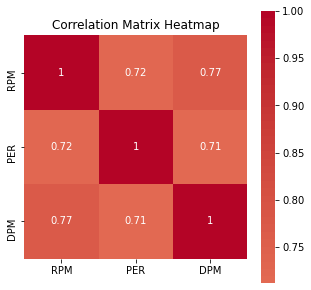

In [37]:
from sklearn.preprocessing import MinMaxScaler



variables1 = ["RPM"]
variables3 = ["PER"]
variables4 =['DPM']

concatenated_df = pd.concat([ESPN_RPM_new[variables1],
                             Hollinger_PER_new[variables3],
                            DARKO_new[variables4]], axis=1)

concatenated_df.set_index(DARKO_new['Player Name'], inplace=True)

# Select the columns containing the metrics
metrics_columns = variables1 + variables3 + variables4

# Normalize the scores between 0 and 1
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(concatenated_df[metrics_columns])

# Create a DataFrame with normalized scores
normalized_df = pd.DataFrame(normalized_scores, columns=metrics_columns)

# Sort the DataFrame by the score range
normalized_df.set_index(DARKO_new['Player Name'], inplace=True)



correlation_matrix = normalized_df.corr()

# Set up the figure and axis size
plt.figure(figsize=(5, 5))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)

plt.title("Correlation Matrix Heatmap")
plt.show()


# Print or visualize the top players with the largest score ranges


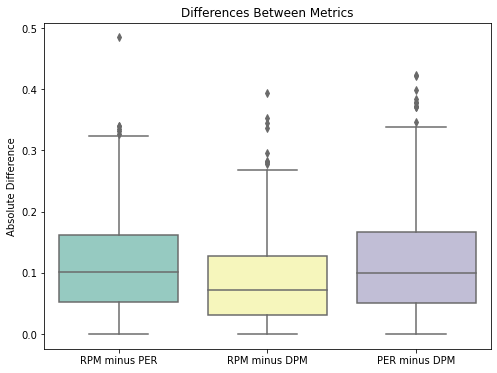

In [43]:
# Calculate the absolute differences between columns
normalized_df['RPM_PER_Diff'] = np.abs(normalized_df['RPM'] - normalized_df['PER'])
normalized_df['RPM_DPM_Diff'] = np.abs(normalized_df['RPM'] - normalized_df['DPM'])
normalized_df['PER_DPM_Diff'] = np.abs(normalized_df['PER'] - normalized_df['DPM'])

# Calculate the standard deviations of the differences
std_devs = normalized_df[['RPM_PER_Diff', 'RPM_DPM_Diff', 'PER_DPM_Diff']].std()

plt.figure(figsize=(8, 6))
sns.boxplot(data=normalized_df[['RPM_PER_Diff', 'RPM_DPM_Diff', 'PER_DPM_Diff']], palette='Set3')
plt.title('Differences Between Metrics')
plt.ylabel('Absolute Difference')
plt.xticks([0, 1, 2], ['RPM minus PER', 'RPM minus DPM', 'PER minus DPM'])
plt.show()

In [96]:
from scipy.stats import f_oneway

# Perform ANOVA test
f_statistic, p_value = f_oneway(
    normalized_df['RPM'],
    normalized_df['PER'],
    normalized_df['DPM']
)

print("ANOVA Test Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There are significant differences between rankings.")
else:
    print("No significant differences between rankings.")

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Stack the data for the test
stacked_data = normalized_df[['RPM', 'PER', 'DPM']].stack()
stacked_data.index = stacked_data.index.set_names(['Player', 'Metric'])

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(stacked_data, stacked_data.index.get_level_values('Metric'), alpha=0.05)

print("Tukey's HSD Test Results:")
print(tukey_result)





ANOVA Test Results:
F-statistic: 56.23991220037307
P-value: 2.8695838680722533e-24
There are significant differences between rankings.
Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   DPM    PER   0.0989  -0.0  0.0763  0.1215   True
   DPM    RPM   0.0267 0.016   0.004  0.0493   True
   PER    RPM  -0.0723  -0.0 -0.0949 -0.0496   True
---------------------------------------------------


In [97]:
concatenated_df

,RPM,PER,DPM
Player Name,,,
Nikola Jokic,7.39,31.78,7.14
Joel Embiid,10.46,31.69,5.54
Giannis Antetokounmpo,5.95,29.29,4.93
Kawhi Leonard,5.12,24.13,4.88
Kevin Durant,4.33,26.14,4.75
...,...,...,...
Jabari Walker,-4.54,9.75,-3.31
Garrett Temple,-3.56,10.62,-3.57
James Wiseman,-2.76,15.75,-3.80


In [98]:
from sklearn.decomposition import PCA

# Select the columns containing the metrics
metrics_columns = variables1 + variables3 + variables4

# Perform PCA
pca = PCA(n_components=1)  # Choose the number of components as needed
pca_result = pca.fit_transform(normalized_df[metrics_columns])

# Add PCA result to the DataFrame
normalized_df['PCA_Component'] = pca_result
normalized_df['original_RPM'] = np.array(concatenated_df['RPM'])

# Sort players by the PCA component
normalized_df.sort_values(by='PCA_Component', ascending=False, inplace=True)


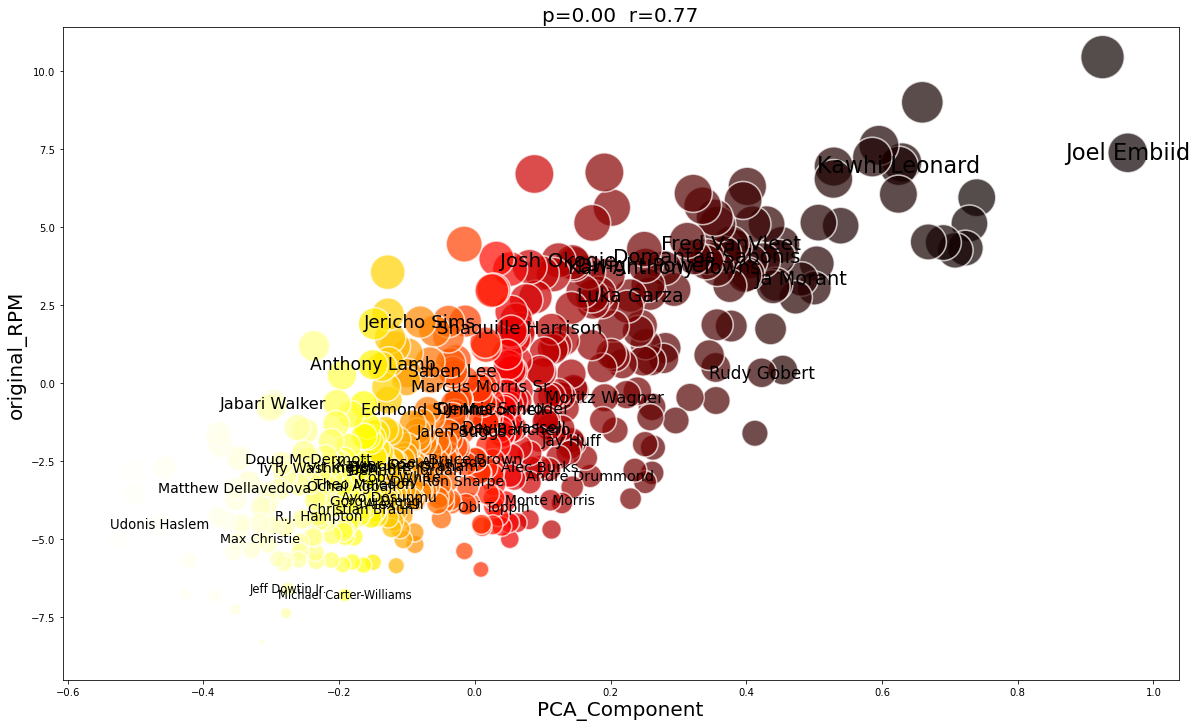

In [99]:

r, p = scipy.stats.pearsonr(normalized_df['PCA_Component'], normalized_df['original_RPM'])

normalized_df['PLAYER'] = normalized_df.index

# Create a DataFrame from the 'data2plot' dictionary
df_data2plot = pd.DataFrame(normalized_df)

# Calculate 's' values for marker sizes based on 'ESPN_RPM'
# You can adjust the scaling factor to fit your preference
scaling_factor = 100  # Adjust as needed
marker_sizes = scaling_factor * (normalized_df['original_RPM'] - normalized_df['original_RPM'].min())

# Set a larger figure size
plt.figure(figsize=(20, 12))  # Adjust the width and height as needed

# Manually specify a custom color for each point
custom_colors = sns.color_palette("hot", n_colors=len(df_data2plot))

# Create the scatter plot with custom colors and marker sizes
ax = sns.scatterplot(x='PCA_Component', 
                     y='original_RPM', 
                     data=df_data2plot,
                     s=marker_sizes,  # Adjust the marker sizes
                     c=custom_colors, 
                     alpha=0.7)

ax.set_xlabel('PCA_Component', fontsize=20)
ax.set_ylabel('original_RPM', fontsize=20)


def normalize_values(input_list, target_min, target_max):
    min_value = min(input_list)
    max_value = max(input_list)
    
    normalized_values = []
    for value in input_list:
        normalized_value = ((value - min_value) / (max_value - min_value)) * (target_max - target_min) + target_min
        normalized_values.append(normalized_value)
    
    return normalized_values

# Example usage
target_min = 10
target_max = 25

normalized_values = normalize_values(marker_sizes, target_min, target_max)



# Annotate the plot with player names
for i, player in enumerate(df_data2plot['PLAYER']):
    if i % 10 == 0:
        ax.text(df_data2plot['PCA_Component'][i], df_data2plot['original_RPM'][i], player, 
                fontsize=normalized_values[i], ha='center', va='center')

plt.title("p={:.2f}  r={:.2f}".format(p, r), fontsize=20)
plt.show()

,RPM,PER,DPM
Player Name,,,
Nikola Jokic,7.39,31.78,7.14
Joel Embiid,10.46,31.69,5.54
Giannis Antetokounmpo,5.95,29.29,4.93
Kawhi Leonard,5.12,24.13,4.88
Kevin Durant,4.33,26.14,4.75
...,...,...,...
Jabari Walker,-4.54,9.75,-3.31
Garrett Temple,-3.56,10.62,-3.57
James Wiseman,-2.76,15.75,-3.80
